In [250]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
import pandas as pd
from datetime import datetime

In [251]:
data = pd.read_csv("./operations.csv", sep=",")
data = data[pd.notnull(data['Country'])]

In [252]:
dates = np.array(data['Mission Date'])

In [253]:
country = np.array(data['Country'])

In [254]:
usa_bombing_dates = [data['Mission Date'] for USA in data['Country'] if USA == 'USA']
gb_bombing_dates = [data['Mission Date'] for GreatBritain in data['Country'] if GreatBritain == 'GREAT BRITAIN']
nz_bombing_dates = [data['Mission Date'] for NewZealand in data['Country'] if NewZealand == 'NEW ZEALAND']
australia_bombing_dates = [data['Mission Date'] for Australia in data['Country'] if Australia == 'AUSTRALIA']
south_africa_bombing_dates = [data['Mission Date'] for SouthAfrica in data['Country'] if SouthAfrica == 'SOUTH AFRICA']

In [255]:
def getNumBombingsPerMonth(dates):
    bombings_per_month = {}
    for date in dates[0]:
        year_month = date.split("/")[0] + "/" +date.split("/")[-1]
        if year_month not in bombings_per_month:
            bombings_per_month[year_month] = 1
        else:
            bombings_per_month[year_month] += 1
    
    return bombings_per_month

In [261]:
def splitAndOrderData(dictionary, **dt):
    sorted_monthly = sorted(dictionary.items()) # sort by key, return a list of tuples
    x, y = zip(*sorted_monthly)
    
    if dt:
        # need to convert dates to datetime
        # so we can plot multiple bars onto the graph
        # at once
        sorted_dates = np.array([datetime.strptime(x[0], '%m/%Y') for x in sorted_monthly])
        sorted_quants = np.array([x[1] for x in sorted_monthly])
    else:
        sorted_dates = np.array([x[0] for x in sorted_monthly])
        sorted_quants = np.array([x[1] for x in sorted_monthly])
        
    return date2num(sorted_dates), sorted_quants

In [267]:
print(len(nz_bombing_dates))
us_monthly = getNumBombingsPerMonth(usa_bombing_dates)
gb_monthly = getNumBombingsPerMonth(gb_bombing_dates)
nz_monthly = getNumBombingsPerMonth(nz_bombing_dates)
australia_monthly = getNumBombingsPerMonth(australia_bombing_dates)
south_africa_monthly = getNumBombingsPerMonth(south_africa_bombing_dates)

for x in us_monthly:
    print us_monthly[x]
print '===================\n'
for x in gb_monthly:
    print gb_monthly[x]


633
4868
2323
697
1504
701
312
3530
5
1059
1355
28
848
5452
2026
503
9900
1378
16
843
361
1431
4538
3110
370
917
561
3227
7414
15
5
1277
48
1468
615
2659
5364
52
4923
252
881
2043
561
6032
1796
595
2095
470
1315
4428
1300
442
478
1516
660
5072
3
1159
846
472
2129
2374
3783
478
446
552
1392
447
1000
1478
4296

4868
2323
697
1504
701
312
3530
5
1059
1355
28
848
5452
2026
503
9900
1378
16
843
361
1431
4538
3110
370
917
561
3227
7414
15
5
1277
48
1468
615
2659
5364
52
4923
252
881
2043
561
6032
1796
595
2095
470
1315
4428
1300
442
478
1516
660
5072
3
1159
846
472
2129
2374
3783
478
446
552
1392
447
1000
1478
4296


[ 478  446  552 2374 3783    5 1478 1000  447 1392 4296    5 1300  442
  478 1516 4428   16  881  252  561 2043 4923   52  697  312  701 2323
 4868  561  370  917 3227 7414  846  660 1355 3530 9900   28  843  361
 1431 4538 3110   48 1277  615 1468 5364 2659  470 1315  595 2095 6032
 1796 1378 1504  503 2026 5452  848   15 1159 1059  472 2129 5072    3]
[ 478  446  552 2374 3783    5 1478 1000  447 1392 4296    5 1300  442
  478 1516 4428   16  881  252  561 2043 4923   52  697  312  701 2323
 4868  561  370  917 3227 7414  846  660 1355 3530 9900   28  843  361
 1431 4538 3110   48 1277  615 1468 5364 2659  470 1315  595 2095 6032
 1796 1378 1504  503 2026 5452  848   15 1159 1059  472 2129 5072    3]


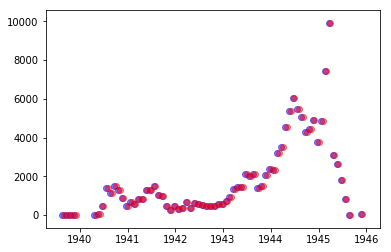

In [263]:
us_dates, us_quants = splitAndOrderData(us_monthly, dt=True)
gb_dates, gb_quants = splitAndOrderData(gb_monthly, dt=True)
nz_dates, nz_quants = splitAndOrderData(nz_monthly, dt=True)
aus_dates, aus_quants = splitAndOrderData(australia_monthly, dt=True)
sa_dates, sa_quants = splitAndOrderData(south_africa_monthly, dt=True)

print us_quants
print gb_quants

ax = plt.subplot(111)
w = 10

ax.scatter(us_dates - w, us_quants, color='b', alpha=0.5)
ax.scatter(gb_dates, gb_quants, color='r', alpha=0.5)
# ax.bar(us_dates, us_quants, width=w, color='black')
ax.xaxis_date()
# ax.autoscale(tight=True)
# plt.xticks(rotation=90)
# plt.bar(sorted_dates, sorted_quants)
# plt.plot(sorted_dates, sorted_quants)
plt.show()

In [259]:
print us_dates


[708571. 708936. 709301. 709666. 710032. 708113. 708479. 708844. 709209.
 709574. 709940. 708144. 708510. 708875. 709240. 709605. 709971. 708174.
 708540. 708905. 709270. 709635. 710001. 710366. 708602. 708967. 709332.
 709697. 710063. 708630. 708995. 709360. 709726. 710091. 708661. 709026.
 709391. 709757. 710122. 708326. 708691. 709056. 709421. 709787. 710152.
 708357. 708722. 709087. 709452. 709818. 710183. 708387. 708752. 709117.
 709482. 709848. 710213. 708418. 708783. 709148. 709513. 709879. 710244.
 708083. 708449. 708814. 709179. 709544. 709910. 710275.]


In [260]:
def splitBombingData(data):
    # dicionary to hold dates and 
    # amount of bombs dropped that day
    bombing_quantities = {}
    
    dates_as_strings = [date for date in data[100]]


    # count how many times a date occurs
    # increment quantity each iteration
    for date in dates_as_strings:
        if date not in bombing_quantities:
            bombing_quantities[date] = 1
        else:
            bombing_quantities[date] += 1
    
    # all of the dates that bombings occurred
    bombing_days = [[date, bombing_quantities[date]] for date in bombing_quantities]
    
    # split the quantity
    dates, quants = [date[0] for date in bombing_days], [quantities[1] for quantities in bombing_days]

    dates, quants = np.array(dates), np.array(quants) 
    stack = np.hstack((dates, quants))
    return stack